In [3]:
# Install the required packages
%pip install matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv('/Users/rising.volkan007/Desktop/Master Thesis/Research project thesis LLM in RE/final set of papers LLM4RE/data extraction and charts/paper_dataset.csv')

In [4]:
df.head()

,Paper no,Paper name,Venue,Year,Abstract
0,1,Generative Language Models Potential for\nRequ...,Arxiv,2024,Traditional language models have been extensiv...
1,2,Which AI Technique Is Better to Classify Requi...,Arxiv,2024,"Recently, Large Language Models like ChatGPT h..."
2,3,ARCHCODE: Incorporating Software Requirements ...,Arxiv,2024,This paper aims to extend the code generation\...
3,4,Prioritizing Software Requirements Using Large...,Arxiv,2024,Large Language Models (LLMs) are revolutionizi...
4,5,Using Large Language Models for Natural\nLangu...,Arxiv,2024,Large Language Models (LLMs) are the cornersto...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Paper no    34 non-null     int64 
 1   Paper name  34 non-null     object
 2   Venue       34 non-null     object
 3   Year        34 non-null     int64 
 4   Abstract    34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [6]:
# Extract the 'Venue' column and calculate the frequency of each unique venue
venue_counts = df['Venue'].value_counts()

In [7]:
venue_counts

Venue
Arxiv             11
REC                5
REW                5
ASE                2
SpringerNature     2
QRS-C              1
SEAA               1
MODELS-C           1
SE                 1
MODELS             1
ISoLA              1
IJIT               1
ICETSIS            1
SEM                1
Name: count, dtype: int64

/var/folders/3j/tlpxgbnn03s1zb0rcz4xx9j80000gn/T/ipykernel_64068/1387361399.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.set_text(f'{venue_counts.index[i]} ({venue_counts[i]})')
/var/folders/3j/tlpxgbnn03s1zb0rcz4xx9j80000gn/T/ipykernel_64068/1387361399.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend(wedges, [f'{venue_counts.index[i]} ({venue_counts[i]})' for i in range(len(venue_counts))], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


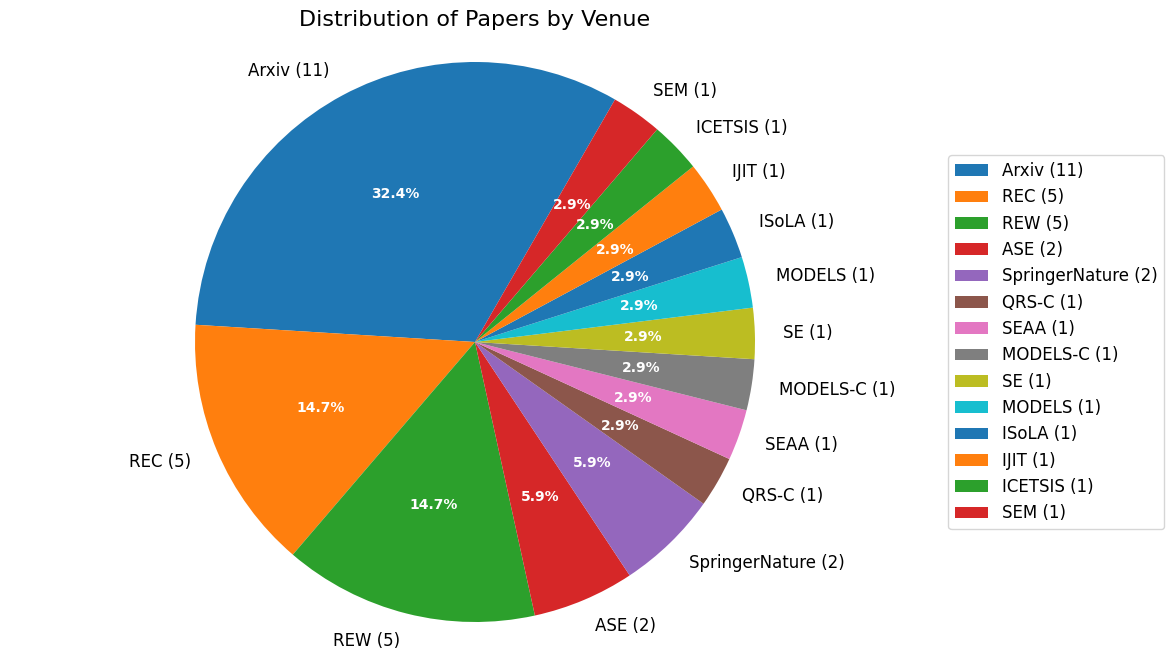

In [8]:
# Generate the pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(venue_counts, labels=None, autopct='%1.1f%%', startangle=60)

# Add the number of papers outside the chart
for i, text in enumerate(texts):
    text.set_text(f'{venue_counts.index[i]} ({venue_counts[i]})')

# Customize the appearance
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
    text.set_bbox(dict(facecolor='white', edgecolor='none', pad=2))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Add legend to avoid overlapping
plt.legend(wedges, [f'{venue_counts.index[i]} ({venue_counts[i]})' for i in range(len(venue_counts))], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.title('Distribution of Papers by Venue', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [9]:
# Extract the 'Year' column and calculate the frequency of each unique year
year_counts = df['Year'].value_counts().sort_index()

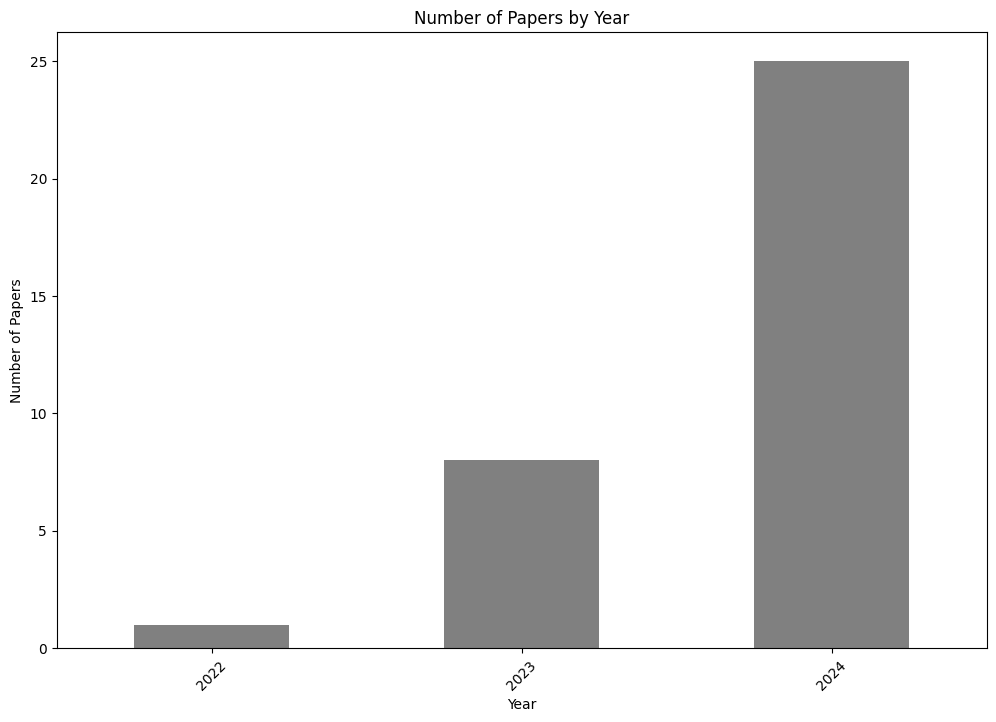

In [10]:
# Generate the bar chart
plt.figure(figsize=(12, 8))
year_counts.plot(kind='bar', color='grey', label='Number of Papers')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers by Year')
plt.xticks(rotation=45)
plt.show()

Note: you may need to restart the kernel to use updated packages.


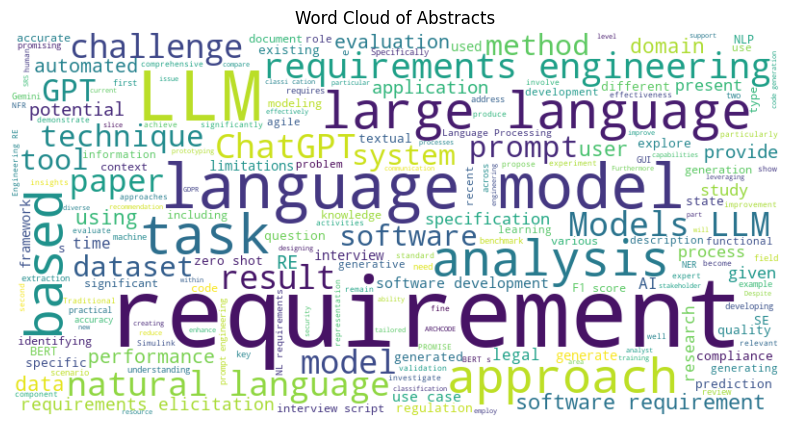

In [11]:
%pip install wordcloud
from wordcloud import WordCloud

# Combine all abstracts into a single string
text = ' '.join(df['Abstract'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Abstracts')
plt.show()